This code demonstrates an unsupervised learning technique, specifically K-Means Clustering, which is used to segment customers based on their Annual Income and Spending Score.

In [1]:
import pandas as pd
import numpy as np

pandas: This is a library used for data manipulation and analysis. It provides data structures like DataFrames, which make handling and analyzing data easier.

numpy: This library is for numerical computing. It provides support for large multi-dimensional arrays and matrices.

In [2]:
url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv'
df = pd.read_csv(url)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


The dataset is loaded from a URL using pd.read_csv(). This dataset contains details of mall customers, including their Annual Income and Spending Score.

df is a pandas DataFrame containing the dataset.

In [3]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

This line selects two features from the dataset: Annual Income and Spending Score.
These are the variables we'll use to segment the customers.

In [4]:
ks = range(2,11)

The range ks represents the possible values for the number of clusters (k) that we will test. We're testing for k values between 2 and 10 to find the optimal number of clusters.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**KMeans**: This is the K-Means clustering algorithm from scikit-learn, which is used to segment data into k clusters. We start with k=4 as an initial guess.

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

**kmeans.fit(x)**: This line fits the K-Means algorithm on the selected features (x). The model assigns each data point (customer) to one of the 4 clusters.

1. n_clusters=4
This sets the number of clusters that the algorithm should form.
The value 4 means that we are asking K-Means to divide the dataset into 4 distinct clusters (groups of similar data points).

The choice of n_clusters is crucial because:

-If it's too low, we might under-cluster the data, meaning we fail to capture important groupings.

-If it's too high, we might over-cluster the data, leading to unnecessary complexity.

This number is usually determined using methods like the Elbow Method (by analyzing inertia) or the Silhouette Score.

2. random_state=42

-This controls the randomness in the K-Means algorithm.

-K-Means starts by randomly selecting cluster centroids, and different runs may give different results if no fixed random seed is set.

-Setting random_state=42 ensures that:
The same initial centroids are chosen every time you run the code.

The results are reproducible (you get the same clustering output each time).



In [7]:
score = silhouette_score(x, kmeans.labels_)
score

0.4937945814354117

**silhouette_score**: This function computes the Silhouette Score, which measures how well-separated the clusters are. The higher the score, the better the clustering.

**kmeans.labels_**: These are the cluster labels assigned to each data point (customer). We pass these along with the data to compute the Silhouette Score.

In [8]:
silhouette_scores = []
inertia_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(score)
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)
    print(f'For k={k}, Inertia={inertia:.3f}, Silhouette Score={score:.3f}')

For k=2, Inertia=183653.329, Silhouette Score=0.396
For k=3, Inertia=106348.373, Silhouette Score=0.468
For k=4, Inertia=73880.645, Silhouette Score=0.494
For k=5, Inertia=44448.455, Silhouette Score=0.554
For k=6, Inertia=40825.169, Silhouette Score=0.513
For k=7, Inertia=33642.579, Silhouette Score=0.502
For k=8, Inertia=26686.838, Silhouette Score=0.496
For k=9, Inertia=24766.472, Silhouette Score=0.456
For k=10, Inertia=23103.122, Silhouette Score=0.443


This loop tests different values of k (from 2 to 10) and computes the Inertia and Silhouette Score for each k.

--Inertia measures how tightly packed the clusters are. Lower inertia means better clustering.

--Silhouette Score gives an idea of how well-separated the clusters are (values close to 1 are ideal).

These metrics are printed for each k, helping to choose the optimal number of clusters.

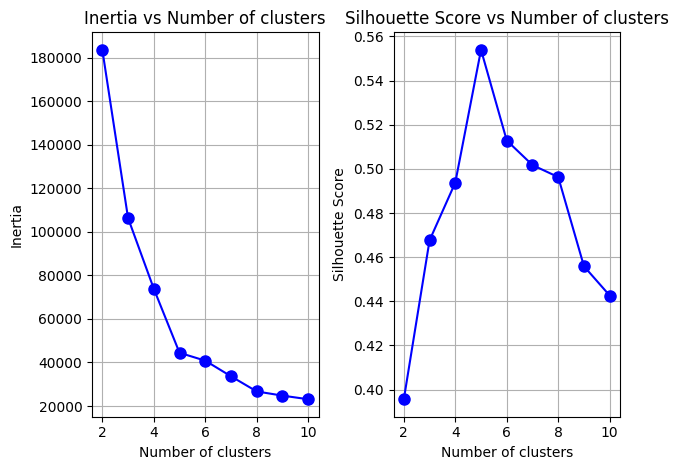

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1, 2, 1)
plt.plot(ks, inertia_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

This part of the code generates two plots:
1. **Inertia vs Number of Clusters**: Helps visualize the relationship between the number of clusters and inertia. We expect inertia to decrease as k increases.
2. **Silhouette Score vs Number of Clusters**: Helps visualize how well the clusters are separated for different k values.

plt.subplot(1, 2, x): Creates subplots side by side.

plt.tight_layout(): Adjusts the spacing between plots to prevent overlap.

In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

After analyzing the plots and metrics, we choose k=5 as the optimal number of clusters.

The K-Means model is refitted using k=5.

In [11]:
cluster_labels = kmeans.predict(x)
cluster_labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

kmeans.predict(x): This line assigns each data point (customer) to one of the 5 clusters after fitting the model.

cluster_labels: These are the predicted cluster labels for each customer.

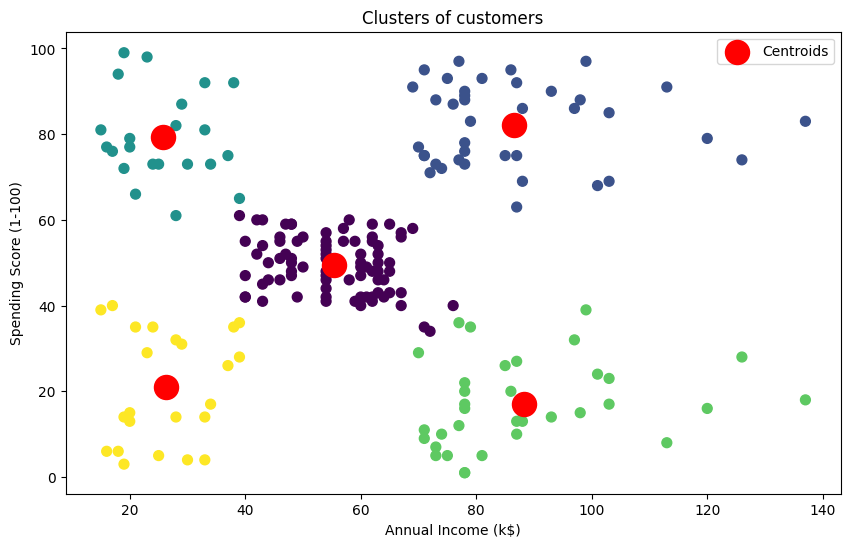

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.legend()

This part visualizes the clusters:

--Scatter plot: Each customer is plotted as a point. The color represents the cluster they belong to (c=cluster_labels).

--Red points: The red points represent the centroids of the clusters, which are the center points of each cluster.

kmeans.cluster_centers_[:, 0] and kmeans.cluster_centers_[:, 1] get the coordinates of the centroids.

Unsupervised Learning: This approach involves finding patterns in data without pre-labeled outcomes. K-Means is a clustering algorithm, where the goal is to group similar data points together.

K-Means Algorithm: An iterative algorithm that partitions data into k clusters based on feature similarity.

Inertia: A measure of how internally cohesive the clusters are; lower inertia implies better clustering.

Silhouette Score: Measures how well-separated the clusters are, with values close to 1 indicating good separation.

Choosing Optimal k: You typically choose k by evaluating inertia and silhouette scores or using methods like the Elbow Method.